In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [255]:
exf=pd.ExcelFile("Takenpy.xlsx")
df=exf.parse("Existing employees")
df1=exf.parse("whohave")

In [256]:
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


In [257]:
df1.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


In [258]:
print(df.isnull().sum())

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64


In [259]:
print(df1.isnull().sum())

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64


In [329]:
#checking for the job satisfaction greater then 60%
satjob=df[df["satisfaction_level"]>0.6]
print(((len(df)-len(satjob))/len(df))*100,"% People are less than 60% satisfied by job")
print(satjob["satisfaction_level"].mean())

49.465737514518004 % People are less than 60% satisfied by job
0.8025350494139322


In [326]:
#checking for the people who have left the job and their satisfaction
satjob1=df1[df1["satisfaction_level"]>0.6]
print(len(satjob1))
print(len(df1))
print(((len(df1)-len(satjob1))/len(df1))*100,"% People have left job when less than 60% satisfied by job")

971
3571
72.80873704844582 % People have left job when less than 60% satisfied by job


In [262]:
#last  evaluation check scores
checkev=df[df["last_evaluation"]>0.5]
print(((len(df)-len(checkev))/len(df))*100,"% People scored less than 50%")

10.456772838641932 % People scored less than 50%


In [263]:
#checking for the people who have left the job
checkev1=df1[df1["last_evaluation"]>0.5]
print(len(checkev1))
print(len(df1))
#people left the job despite the fact that they scored good in their evaluation
print(((len(df1)-len(checkev1))/len(df1))*100,"% left job whose score where less than 50%")

2845
3571
20.33043965275833 % left job whose score where less than 50%


In [264]:
#checking the count of salary
checks=Counter(list(df["salary"]))
print(checks)
#checking for the left one
checks1=Counter(list(df1["salary"]))
print(checks1)
#can be observed that the people with less salary have left the job most

Counter({'low': 5144, 'medium': 5129, 'high': 1155})
Counter({'low': 2172, 'medium': 1317, 'high': 82})


In [265]:
#checking the department of people
depts=dict(Counter(list(df["dept"])))
print(depts)
#checking for the change of people %
depts1=dict(Counter(list(df1["dept"])))
print(depts1)
store={}
#checking job change % wise
if len(depts)==len(depts1):
    for i in depts.keys():
        print(i,(depts[i]-depts1[i]),"is change ",((depts[i]-depts1[i])/depts[i])*100,"%left the job")
        store[i]=((depts[i]-depts1[i])/depts[i])*100

{'sales': 3126, 'accounting': 563, 'hr': 524, 'technical': 2023, 'support': 1674, 'management': 539, 'IT': 954, 'product_mng': 704, 'RandD': 666, 'marketing': 655}
{'sales': 1014, 'accounting': 204, 'hr': 215, 'technical': 697, 'support': 555, 'management': 91, 'IT': 273, 'product_mng': 198, 'marketing': 203, 'RandD': 121}
sales 2112 is change  67.56238003838772 %left the job
accounting 359 is change  63.765541740674955 %left the job
hr 309 is change  58.96946564885496 %left the job
technical 1326 is change  65.54621848739495 %left the job
support 1119 is change  66.84587813620072 %left the job
management 448 is change  83.11688311688312 %left the job
IT 681 is change  71.38364779874213 %left the job
product_mng 506 is change  71.875 %left the job
RandD 545 is change  81.83183183183183 %left the job
marketing 452 is change  69.00763358778626 %left the job


In [266]:
for i in store:
    print(i,store[i])

sales 67.56238003838772
accounting 63.765541740674955
hr 58.96946564885496
technical 65.54621848739495
support 66.84587813620072
management 83.11688311688312
IT 71.38364779874213
product_mng 71.875
RandD 81.83183183183183
marketing 69.00763358778626


In [267]:
#we have got the sales report and the % change who left the job

In [268]:
#counting the performance and the promotion thing
countprom=df[df["promotion_last_5years"]==1]
print(len(countprom),"employee got promotion")
#counting the performance and promotion for the people who have left
countprom=df1[df1["promotion_last_5years"]==1]
print(len(countprom),"employee got promotion")

300 employee got promotion
19 employee got promotion


In [269]:
#counting the work performance
countwork=df[df["Work_accident"]==1]
print(len(countwork),"got accident")
print(len(df))
#counting the performance and promotion for the people who have left
countwork1=df1[df1["Work_accident"]==1]
print(len(countwork1),"left accident")
print(len(df1))

2000 got accident
11428
169 left accident
3571


In [330]:
#checking hour count
x=df1["average_montly_hours"]
print(x.mean())
#print(df1)
df=df[df["average_montly_hours"]>207]
print(len(df))
df1=df1[df1["average_montly_hours"]>207]
print(len(df1))

207.41921030523662
6942
1903


In [278]:
#time_spent_company
xy=df1["time_spend_company"]
print(xy.median())
xyu=df[df["time_spend_company"]>4]
print(len(df1[df1["time_spend_company"]>4]))
print(len(xyu))
#fresher drop

4.0
1042
752


In [279]:
plt.figure(figsize=(18,10))
sns.countplot(df1["last_evaluation"])

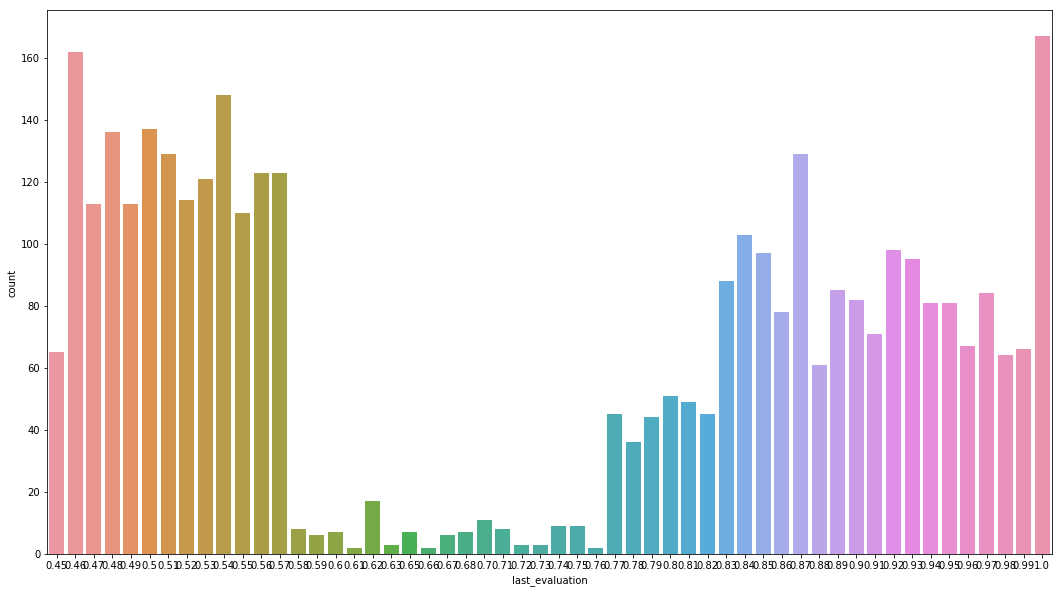

In [280]:
plt.show()

In [281]:
from sklearn import preprocessing

In [282]:
le = preprocessing.LabelEncoder()

In [283]:
df["result"]=0
df1["result"]=1

In [284]:
df=df.append(df1)

In [285]:
df

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,result
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0
9,2010,0.74,0.64,4,268,3,0,0,sales,low,0
10,2011,0.56,0.58,4,258,3,0,0,sales,medium,0
12,2013,0.48,0.94,5,255,6,0,0,accounting,medium,0
13,2014,0.73,0.62,3,218,3,0,0,accounting,medium,0
14,2015,0.59,0.87,3,268,4,0,0,accounting,medium,0
15,2016,0.81,0.57,3,224,2,0,0,hr,medium,0
16,2017,0.90,0.66,3,231,3,0,0,hr,medium,0


In [286]:
le.fit(df["salary"])
df["salary"]=le.transform(df["salary"])
le.fit(df["dept"])
df["dept"]=le.transform(df["dept"])

In [287]:
io=df.corr()
plt.figure(figsize=(18,10))

In [288]:
sns.heatmap(io,cmap="plasma",annot=True)

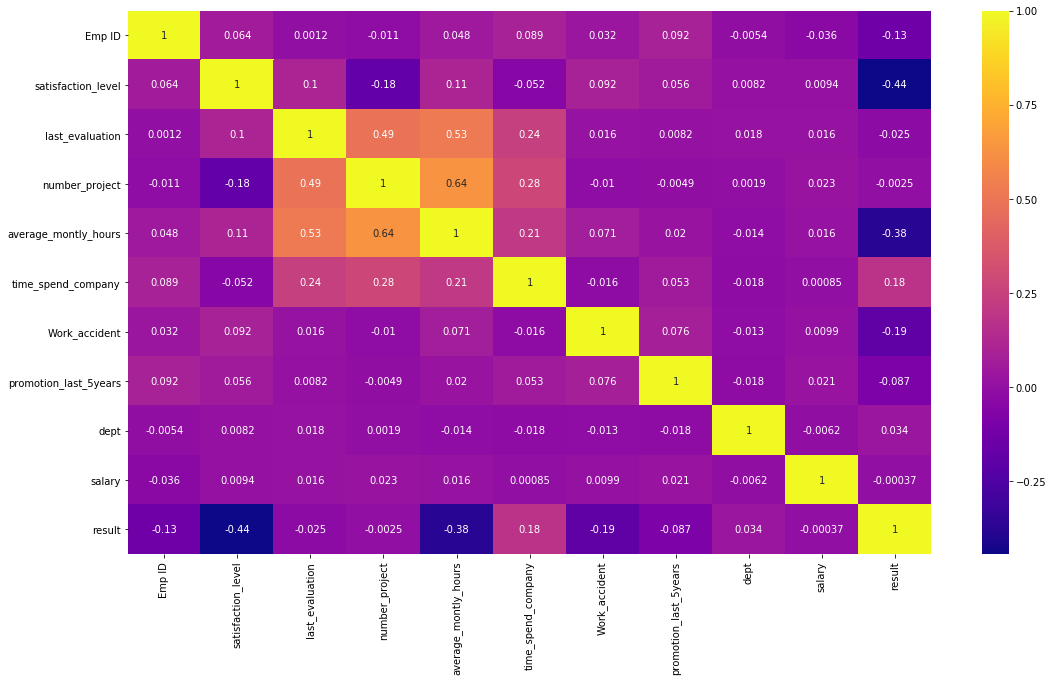

In [289]:
plt.show()

In [290]:
df
dfio=df[df["dept"]==7]

In [291]:
dfio=dfio[dfio["salary"]==1]

In [292]:
dfio

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,result
0,2001,0.58,0.74,4,215,3,0,0,7,1,0
3,2004,0.78,0.82,5,247,3,0,0,7,1,0
4,2005,0.49,0.60,3,214,2,0,0,7,1,0
9,2010,0.74,0.64,4,268,3,0,0,7,1,0
69,2070,0.53,0.81,3,226,3,1,0,7,1,0
71,2072,0.92,0.65,4,238,2,0,0,7,1,0
76,2077,0.51,0.69,3,212,3,0,0,7,1,0
77,2078,0.74,0.62,4,236,4,0,0,7,1,0
78,2079,0.69,0.57,5,245,2,1,0,7,1,0
79,2080,0.84,0.64,4,267,4,0,0,7,1,0


In [293]:
df.groupby(["dept"])["salary"].value_counts().plot()

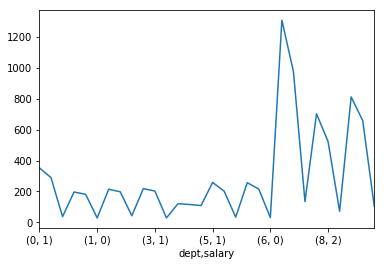

In [294]:
plt.show()

In [295]:
sns.pairplot(df)

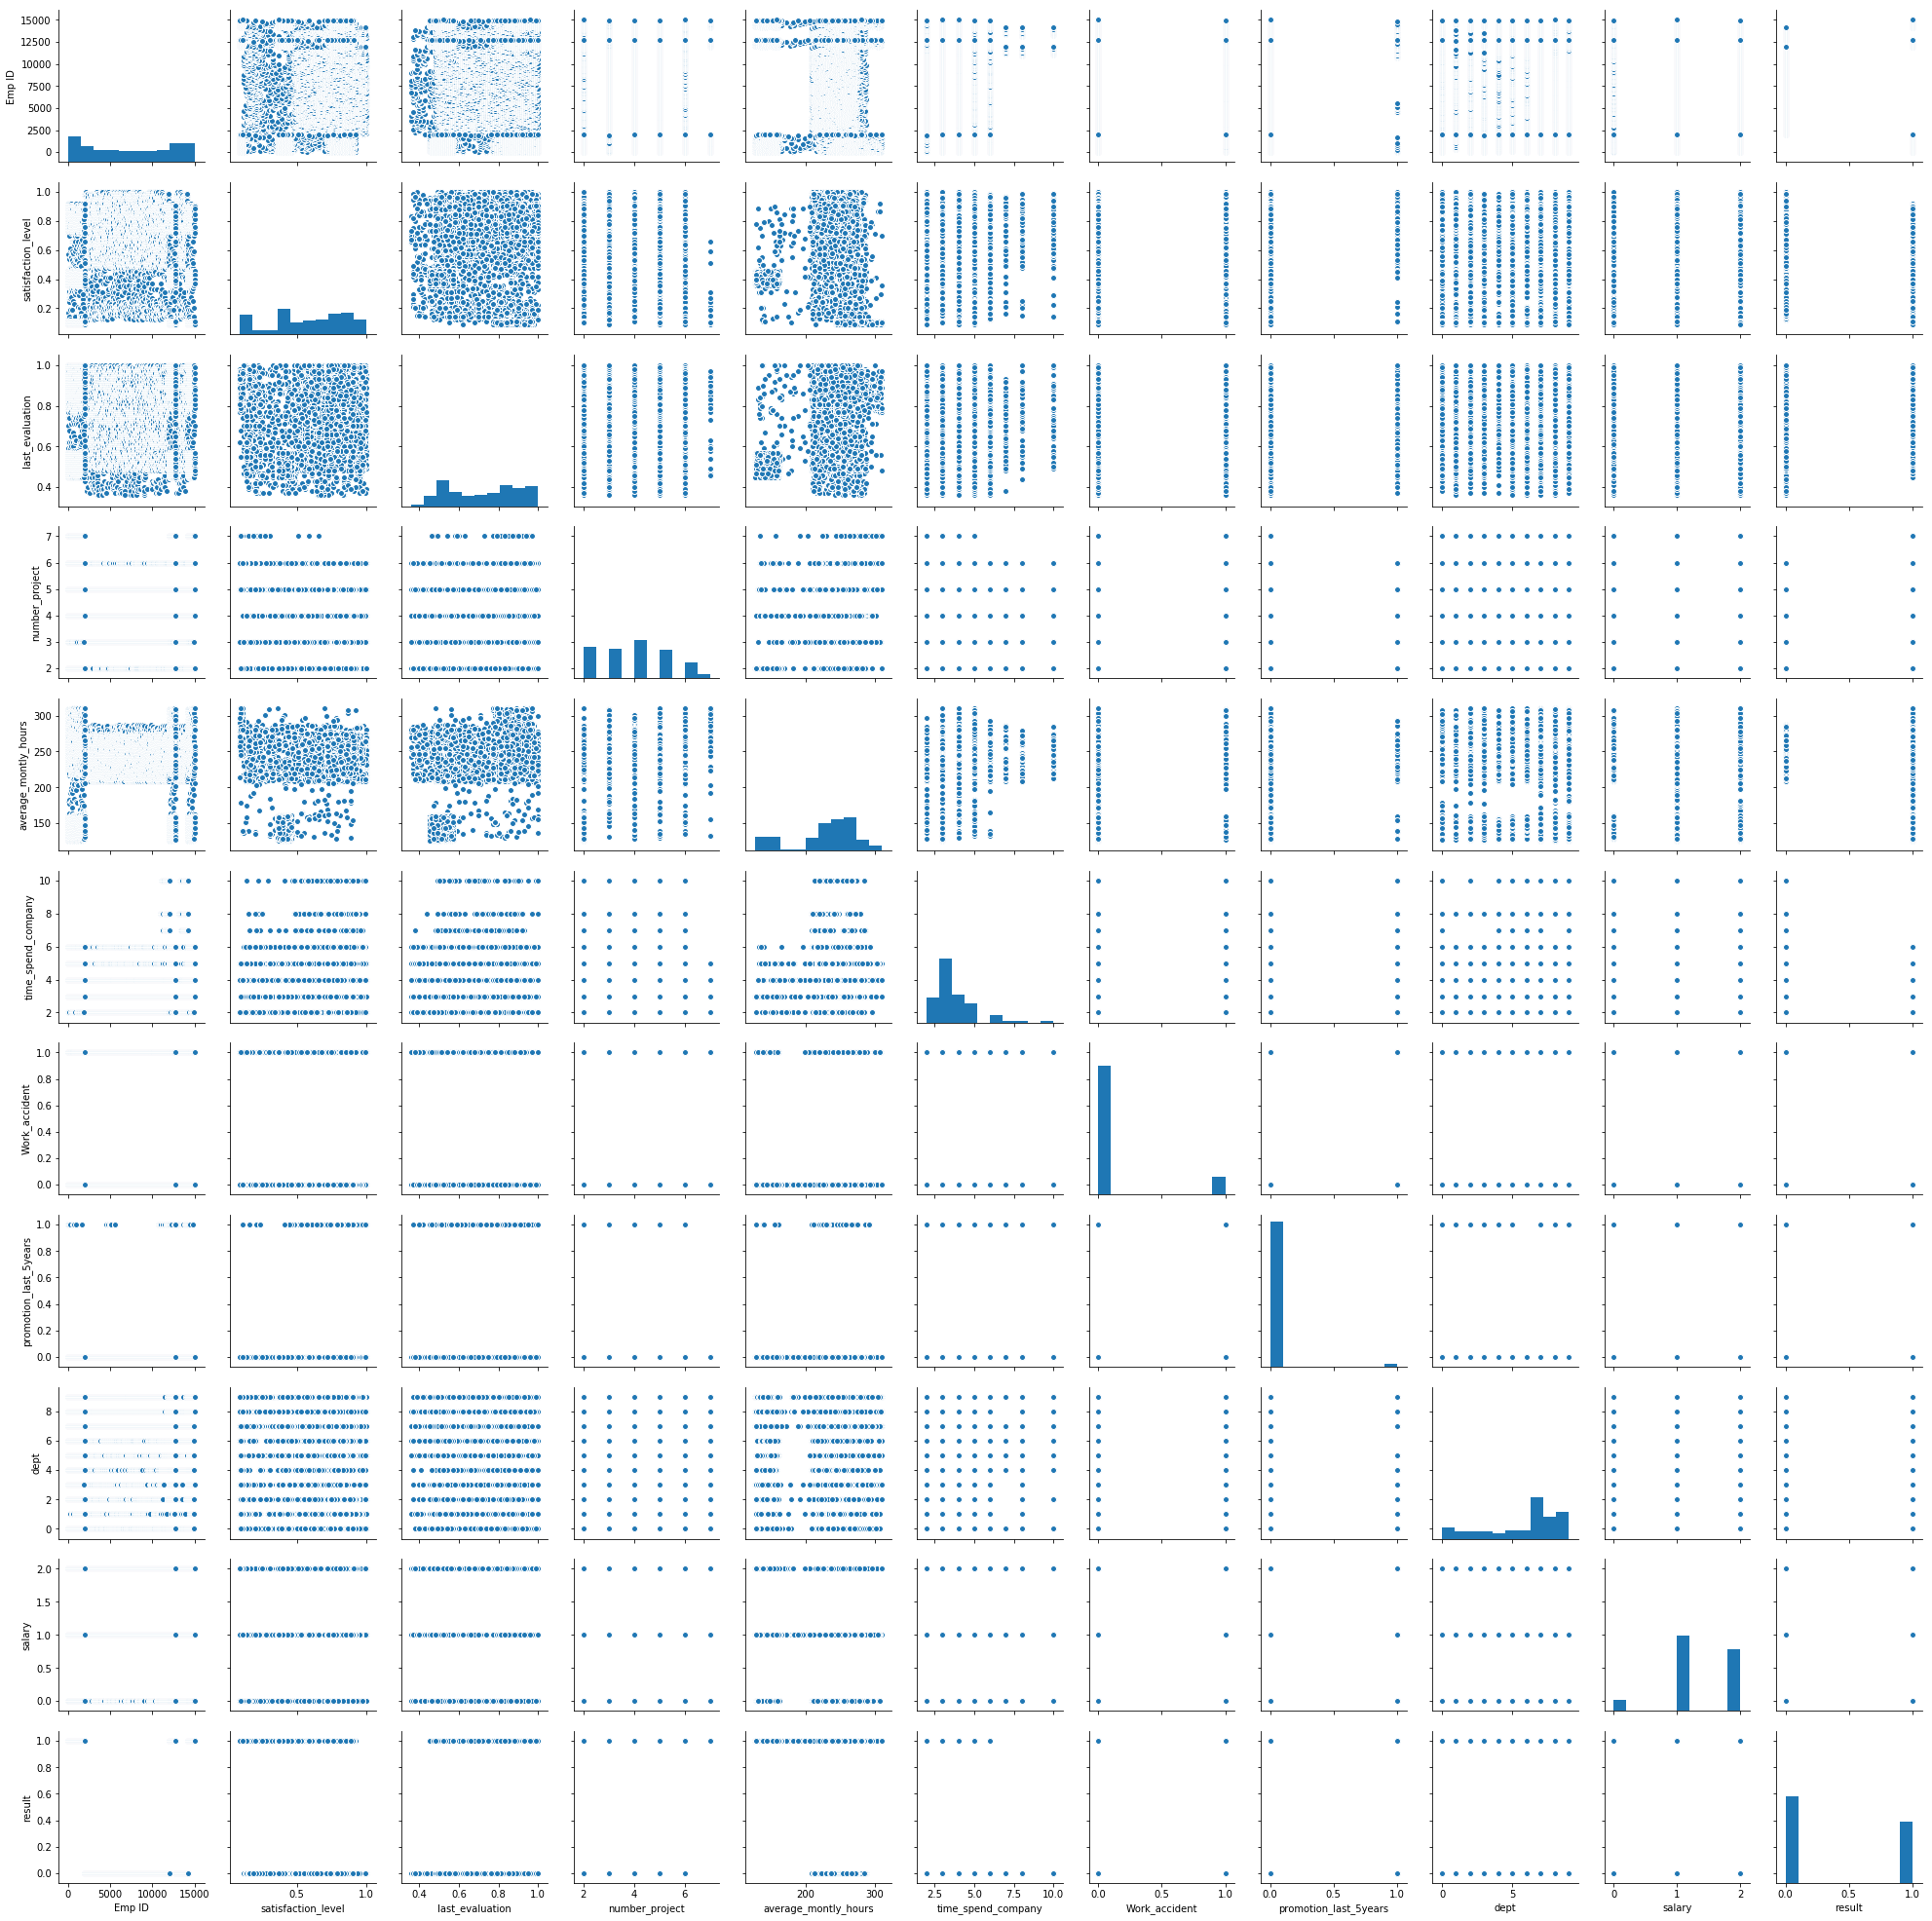

In [296]:
plt.show()

In [297]:
  df1

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,result
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1
5,6,0.41,0.50,2,153,3,0,0,sales,low,1
6,7,0.10,0.77,6,247,4,0,0,sales,low,1
7,8,0.92,0.85,5,259,5,0,0,sales,low,1
8,9,0.89,1.00,5,224,5,0,0,sales,low,1
9,10,0.42,0.53,2,142,3,0,0,sales,low,1


In [305]:
le.fit(df1["salary"])
df1["salary"]=le.transform(df1["salary"])

In [306]:
le.fit(df1["dept"])
df1["dept"]=le.transform(df1["dept"])

In [307]:
df1


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,result
0,1,0.38,0.53,2,157,3,0,0,7,1,1
1,2,0.80,0.86,5,262,6,0,0,7,2,1
2,3,0.11,0.88,7,272,4,0,0,7,2,1
3,4,0.72,0.87,5,223,5,0,0,7,1,1
4,5,0.37,0.52,2,159,3,0,0,7,1,1
5,6,0.41,0.50,2,153,3,0,0,7,1,1
6,7,0.10,0.77,6,247,4,0,0,7,1,1
7,8,0.92,0.85,5,259,5,0,0,7,1,1
8,9,0.89,1.00,5,224,5,0,0,7,1,1
9,10,0.42,0.53,2,142,3,0,0,7,1,1


In [308]:
dfcp=df1[:]
del dfcp["Emp ID"]

In [316]:
pocorr=dfcp.corr()

In [317]:
plt.figure(figsize=(18,10))
sns.heatmap(pocorr,annot=True,cmap="plasma")

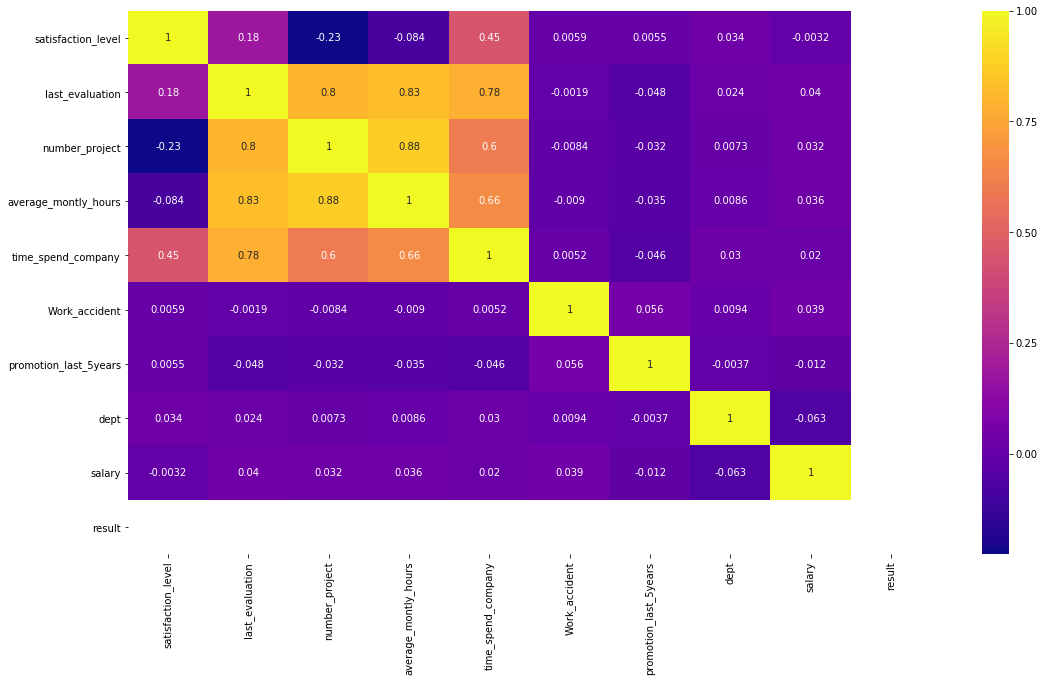

In [318]:
plt.savefig("check12.png")
plt.show()


In [333]:
print(Counter(df1["number_project"]))

Counter({6: 628, 5: 581, 4: 376, 7: 248, 3: 38, 2: 32})
